In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
schedule = pd.read_csv('processed/schedule.csv', index_col=0)
states = pd.read_csv('processed/states.csv', index_col=0)

In [37]:
states = states.drop(columns='network_request_Produce_TemporaryMemoryBytes', errors='ignore')
states = states.drop(columns='network_socket_FetchConsumer_RequestHandlerAvgIdlePercent', errors='ignore')


In [38]:
df = pd.concat([states, schedule], axis=1)
df.corr()[schedule.columns]

,producer->batch_size,producer->linger_ms,producer->buffer_memory,producer->compression_type,producer->topics,broker->num.network.threads,broker->num.io.threads,broker->queued.max.requests,consumer->fetch_wait_max_ms
Latency,0.044319,0.320030,-0.045296,0.403046,-0.011686,0.054680,-0.005765,0.005580,-0.023254
Throughput,0.038502,-0.031218,0.073976,-0.176119,0.046819,-0.029977,-0.036823,0.112916,0.049085
gc_collection_count,0.023030,-0.466632,0.006485,0.016390,-0.036038,-0.065438,0.001574,0.050966,0.076389
gc_collection_time,0.054079,-0.332622,0.054610,0.089242,-0.064138,-0.082356,0.005018,0.094087,-0.045718
jvm_loaded_class_count,0.001628,-0.000264,-0.106024,0.198934,-0.035855,0.098296,-0.020230,0.082104,0.053100
jvm_total_loaded_class_count,-0.021683,0.060633,-0.107139,0.246442,-0.095828,0.040271,-0.038388,0.085265,0.029360
last_gc_info_duration,0.016840,0.110848,0.038416,-0.072360,-0.017994,0.010582,0.026372,-0.065642,-0.035566
memory_heap_usage_used,0.084372,-0.127575,0.081799,0.416485,0.012106,-0.077438,-0.100558,0.158508,0.071628
memory_non_heap_usage_used,0.033593,-0.188800,-0.033471,-0.080428,-0.006540,0.002116,-0.033743,0.067400,0.121605
network_request_FetchConsumer_ResponseSendTimeMs,-0.039557,0.144057,0.043830,0.070769,0.114331,-0.086902,-0.040602,0.159380,0.023600


In [40]:
states.describe()

,Latency,Throughput,gc_collection_count,gc_collection_time,jvm_loaded_class_count,jvm_total_loaded_class_count,last_gc_info_duration,memory_heap_usage_used,memory_non_heap_usage_used,network_request_FetchConsumer_ResponseSendTimeMs,...,os_process_cpu_load,os_process_cpu_time,os_system_cpu_load,server_broker_topics_AllTopicsBytesIn,server_broker_topics_AllTopicsBytesOut,server_broker_topics_AllTopicsMessagesIn,server_broker_topics_TotalFetchRequestsPerSec,server_broker_topics_TotalProduceRequestsPerSec,server_purgatory_NumDelayedFetchRequests,threading_thread_count
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,2.140000e+02,2.140000e+02,214.00000,...,214.000000,2.140000e+02,214.000000,214.000000,2.140000e+02,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.495794,0.266682,7.671869,105.300514,7013.541916,7139.868318,16.439252,1.975605e+08,6.314492e+07,127944.18771,...,0.010093,2.142117e+10,0.591402,8869.149860,4.526941e+05,19.474393,114.725981,14.231822,47.058551,68.572290
std,0.868704,0.504034,0.562548,12.088959,17.911158,16.279685,2.574379,7.015637e+06,3.371442e+05,11711.24986,...,0.000964,1.337849e+09,0.024779,5504.332418,3.281572e+05,2.162594,14.409452,4.111480,2.811847,0.378895
min,0.850000,0.020000,5.800000,77.600000,6972.660000,7094.200000,10.710000,1.759783e+08,6.212510e+07,0.00000,...,0.010000,1.481000e+10,0.520000,32.860000,0.000000e+00,0.270000,0.590000,0.150000,41.750000,67.020000
25%,1.792500,0.030000,7.300000,96.825000,7003.510000,7131.500000,14.590000,1.926268e+08,6.301779e+07,123376.50000,...,0.010000,2.122625e+10,0.580000,5014.150000,2.417309e+05,18.820000,109.350000,10.462500,45.055000,68.480000
50%,2.715000,0.040000,7.700000,106.450000,7012.590000,7138.700000,16.275000,1.961612e+08,6.317988e+07,125746.25000,...,0.010000,2.160800e+10,0.590000,6558.290000,3.031701e+05,19.745000,113.300000,13.325000,46.635000,68.570000
75%,3.267500,0.050000,8.100000,112.750000,7022.235000,7145.325000,18.210000,2.024703e+08,6.329427e+07,134114.12500,...,0.010000,2.203850e+10,0.610000,9018.815000,5.475380e+05,20.140000,118.347500,19.017500,48.870000,68.630000
max,3.850000,2.100000,9.290000,162.200000,7128.010000,7256.670000,24.620000,2.326714e+08,6.542004e+07,164038.00000,...,0.020000,2.788800e+10,0.680000,21592.200000,1.927937e+06,34.010000,215.570000,22.750000,57.580000,71.540000


In [35]:
# Construct env prediction model using RF or GB
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

# Ensure output directories exist
os.makedirs('tmp', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Set NaN values to 0 in states
states = states.fillna(0)
print("Set all NaN values in states to 0.")

# Drop the specified column
states = states.drop(columns='network_request_Produce_TemporaryMemoryBytes', errors='ignore')
print(f"Columns in states after dropping: {list(states.columns)}")

w = 6
h = 4
ncols = 4
nrows = math.ceil(states.shape[1] / ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w * ncols, h * nrows))
fig.tight_layout(pad=6)

# Build regression model for every column
for i, col in enumerate(states.columns):
    print(f"\nProcessing column: {col}")
    
    # Prepare data
    y = states[[col]].copy()
    
    # Convert to numeric, coercing errors to NaN (then fill with 0)
    y[col] = pd.to_numeric(y[col], errors='coerce').fillna(0)
    
    # Check if all values are zero or invalid
    if y[col].eq(0).all():
        print(f"Skipping {col}: All values are zero after cleaning.")
        continue
    
    # Align features with target
    X = schedule.loc[y.index].copy()
    
    # Check for NaN in features and fill with 0
    if X.isna().any().any():
        print(f"Warning: NaN values found in features for {col}. Filling with 0.")
        X = X.fillna(0)
    
    if X.empty or y.empty:
        print(f"Skipping {col}: No data after cleaning.")
        continue
    
    print(f"Data shape - X: {X.shape}, y: {y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10000
    )
    
    # Scale features and target
    scaler_X = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(
        scaler_X.transform(X_train), columns=X_train.columns, index=X_train.index
    )
    X_test = pd.DataFrame(
        scaler_X.transform(X_test), columns=X_test.columns, index=X_test.index
    )
    
    scaler_y = MinMaxScaler().fit(y_train)
    y_train = pd.DataFrame(
        scaler_y.transform(y_train), columns=y_train.columns, index=y_train.index
    )
    y_test = pd.DataFrame(
        scaler_y.transform(y_test), columns=y_test.columns, index=y_test.index
    )
    
    # Save scaled data for debugging
    y_train.to_csv(f'tmp/{col}-train.csv')
    y_test.to_csv(f'tmp/{col}-test.csv')
    X_train.to_csv(f'tmp/{col}-X_train.csv')
    X_test.to_csv(f'tmp/{col}-X_test.csv')
    
    # Choose the best model
    best_score = -float('inf')
    best_model = None
    rf = RandomForestRegressor(
        n_estimators=100, max_depth=10, random_state=1000, n_jobs=-1
    )
    gb = GradientBoostingRegressor(
        n_estimators=100, max_depth=3, random_state=1000
    )
    models = [gb, rf]
    
    for model in models:
        try:
            cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1000)
            n_scores = cross_val_score(
                model, X_train, y_train.to_numpy().squeeze(), scoring='r2', cv=cv, n_jobs=-1
            )
            valid_scores = n_scores[~np.isnan(n_scores)]
            if len(valid_scores) == 0:
                print(f"No valid scores for {col} with {model.__class__.__name__}.")
                continue
            mean_score = np.mean(valid_scores)
            std_score = np.std(valid_scores)
            print(f"{col} with {model.__class__.__name__}: R2 = {mean_score:.3f} (±{std_score:.3f})")
            
            if mean_score > best_score:
                best_score = mean_score
                best_model = model
        except Exception as e:
            print(f"Error evaluating {col} with {model.__class__.__name__}: {e}")
            continue
    
    if best_model is None:
        print(f"Skipping {col}: No valid model found.")
        continue
    
    # Train and save the best model
    best_model.fit(X_train, y_train.to_numpy().squeeze())
    joblib.dump(best_model, f'./models/{col}.joblib')
    
    # Predict and evaluate
    y_predict = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_predict)
    print(f"{col} Test R²: {test_r2:.3f}")
    
    # Plot results
    r = int(i / ncols)
    c = int(i % ncols)
    ax[r][c].set_xlim(0, 1)
    ax[r][c].set_ylim(0, 1)
    ax[r][c].set_title(f"{col} (Test R²: {test_r2:.3f})")
    ax[r][c].set_xlabel('Observed Value')
    ax[r][c].set_ylabel('Predicted Value')
    ax[r][c].grid()
    ax[r][c].scatter(y_test, y_predict, alpha=0.5)

# Hide empty subplots
for i in range(len(states.columns), nrows * ncols):
    r = int(i / ncols)
    c = int(i % ncols)
    ax[r][c].set_visible(False)

# Save the figure
plt.savefig('results.png', dpi=300, bbox_inches='tight')
plt.close()

Set all NaN values in states to 0.
Columns in states after dropping: ['Latency', 'Throughput', 'gc_collection_count', 'gc_collection_time', 'jvm_loaded_class_count', 'jvm_total_loaded_class_count', 'last_gc_info_duration', 'memory_heap_usage_used', 'memory_non_heap_usage_used', 'network_request_FetchConsumer_ResponseSendTimeMs', 'network_request_FetchConsumer_TotalTimeMs', 'network_request_Produce_ResponseSendTimeMs', 'network_request_Produce_TotalTimeMs', 'network_socket_FetchConsumer_NetworkProcessorAvgIdlePercent', 'network_socket_FetchConsumer_RequestHandlerAvgIdlePercent', 'os_committed_vm_size', 'os_open_fd_count', 'os_process_cpu_load', 'os_process_cpu_time', 'os_system_cpu_load', 'server_broker_topics_AllTopicsBytesIn', 'server_broker_topics_AllTopicsBytesOut', 'server_broker_topics_AllTopicsMessagesIn', 'server_broker_topics_TotalFetchRequestsPerSec', 'server_broker_topics_TotalProduceRequestsPerSec', 'server_purgatory_NumDelayedFetchRequests', 'threading_thread_count']

Proce

In [ ]:
# Construct env prediction model using RF or GB
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_squared_log_error, mean_absolute_error, explained_variance_score, r2_score
import joblib
import autosklearn.regression

w = 6
h = 4
ncols = 4
nrows = math.ceil(states.shape[1]/ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w*ncols, h*nrows))
fig.tight_layout(pad=6)

# build regression model for every column
for i, col in enumerate(states.columns):
    y = states[col].to_frame()
    y = y[y[col] != 'None']
    X =schedule.loc[y.index]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000)
    scaler = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index) 

    scaler = MinMaxScaler().fit(y_train)
    y_train = pd.DataFrame(scaler.transform(y_train), columns=y_train.columns, index=y_train.index)
    y_test = pd.DataFrame(scaler.transform(y_test), columns=y_test.columns, index=y_test.index)

    y_train.to_csv('tmp/%s-train.csv' % col)
    y_test.to_csv('tmp/%s-test.csv' % col)
    

    # choose the best model from RF and GB
    # rf = RandomForestRegressor(random_state=1000)
    # gb = GradientBoostingRegressor(random_state=1000)
    # models = [gb, rf]
    # for model in models:
    #     # define the evaluation procedure
    #     cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1000)
    #     n_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    #     if np.mean(n_scores) > best_score:
    #         best_model = model
    #         best_score = np.mean(n_scores)
    #         best_model.fit(X=X_train, y=y_train.to_numpy().squeeze())
    #         joblib.dump(best_model, './models/%s.joblib' % col)
    #     print('%s: %.3f (%.3f)' % (col, np.mean(n_scores), np.std(n_scores)))
    
    # y_predict = best_model.predict(X_test)
    
    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='./autosklearn_regression_tmp',
        output_folder='./autosklearn_regression_out',
    )
    automl.fit(X_train, y_train, dataset_name=col)

    y_predict = automl.predict(X_test)
    r = int(i/ncols)
    c = int(i%ncols)
    ax[r][c].set_xlim(0, 1)
    ax[r][c].set_ylim(0, 1)
    ax[r][c].set_title(col)
    ax[r][c].set_xlabel('Observed Value')
    ax[r][c].set_ylabel('Predicted Value')
    ax[r][c].grid()
    ax[r][c].scatter(y_test, y_predict)

plt.savefig('results.png', dpi=300)

Latency with GradientBoostingRegressor: R2 = 0.728 (±0.103)
Latency with RandomForestRegressor: R2 = 0.758 (±0.109)
Throughput with GradientBoostingRegressor: R2 = -0.731 (±1.236)
Throughput with RandomForestRegressor: R2 = -0.500 (±1.183)
gc_collection_count with GradientBoostingRegressor: R2 = 0.118 (±0.199)
gc_collection_count with RandomForestRegressor: R2 = 0.165 (±0.192)
gc_collection_time with GradientBoostingRegressor: R2 = -0.193 (±0.258)
gc_collection_time with RandomForestRegressor: R2 = -0.050 (±0.185)
jvm_loaded_class_count with GradientBoostingRegressor: R2 = -0.468 (±0.396)
jvm_loaded_class_count with RandomForestRegressor: R2 = -0.221 (±0.241)
jvm_total_loaded_class_count with GradientBoostingRegressor: R2 = -0.700 (±0.640)
jvm_total_loaded_class_count with RandomForestRegressor: R2 = -0.283 (±0.314)
last_gc_info_duration with GradientBoostingRegressor: R2 = -0.316 (±0.266)
last_gc_info_duration with RandomForestRegressor: R2 = -0.177 (±0.187)
memory_heap_usage_used wit

/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 1257, in r2_score
    _check_reg_targets_with_floating_dtype(
  File "/users/grad/etti/pinet/stream

network_request_FetchConsumer_ResponseSendTimeMs with GradientBoostingRegressor: R2 = nan (±nan)
network_request_FetchConsumer_ResponseSendTimeMs with RandomForestRegressor: R2 = nan (±nan)


/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "/users/grad/etti/pinet/stream2gym/.env/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 1257, in r2_score
    _check_reg_targets_with_floating_dtype(
  File "/users/grad/etti/pinet/stream

AttributeError: 'NoneType' object has no attribute 'fit'

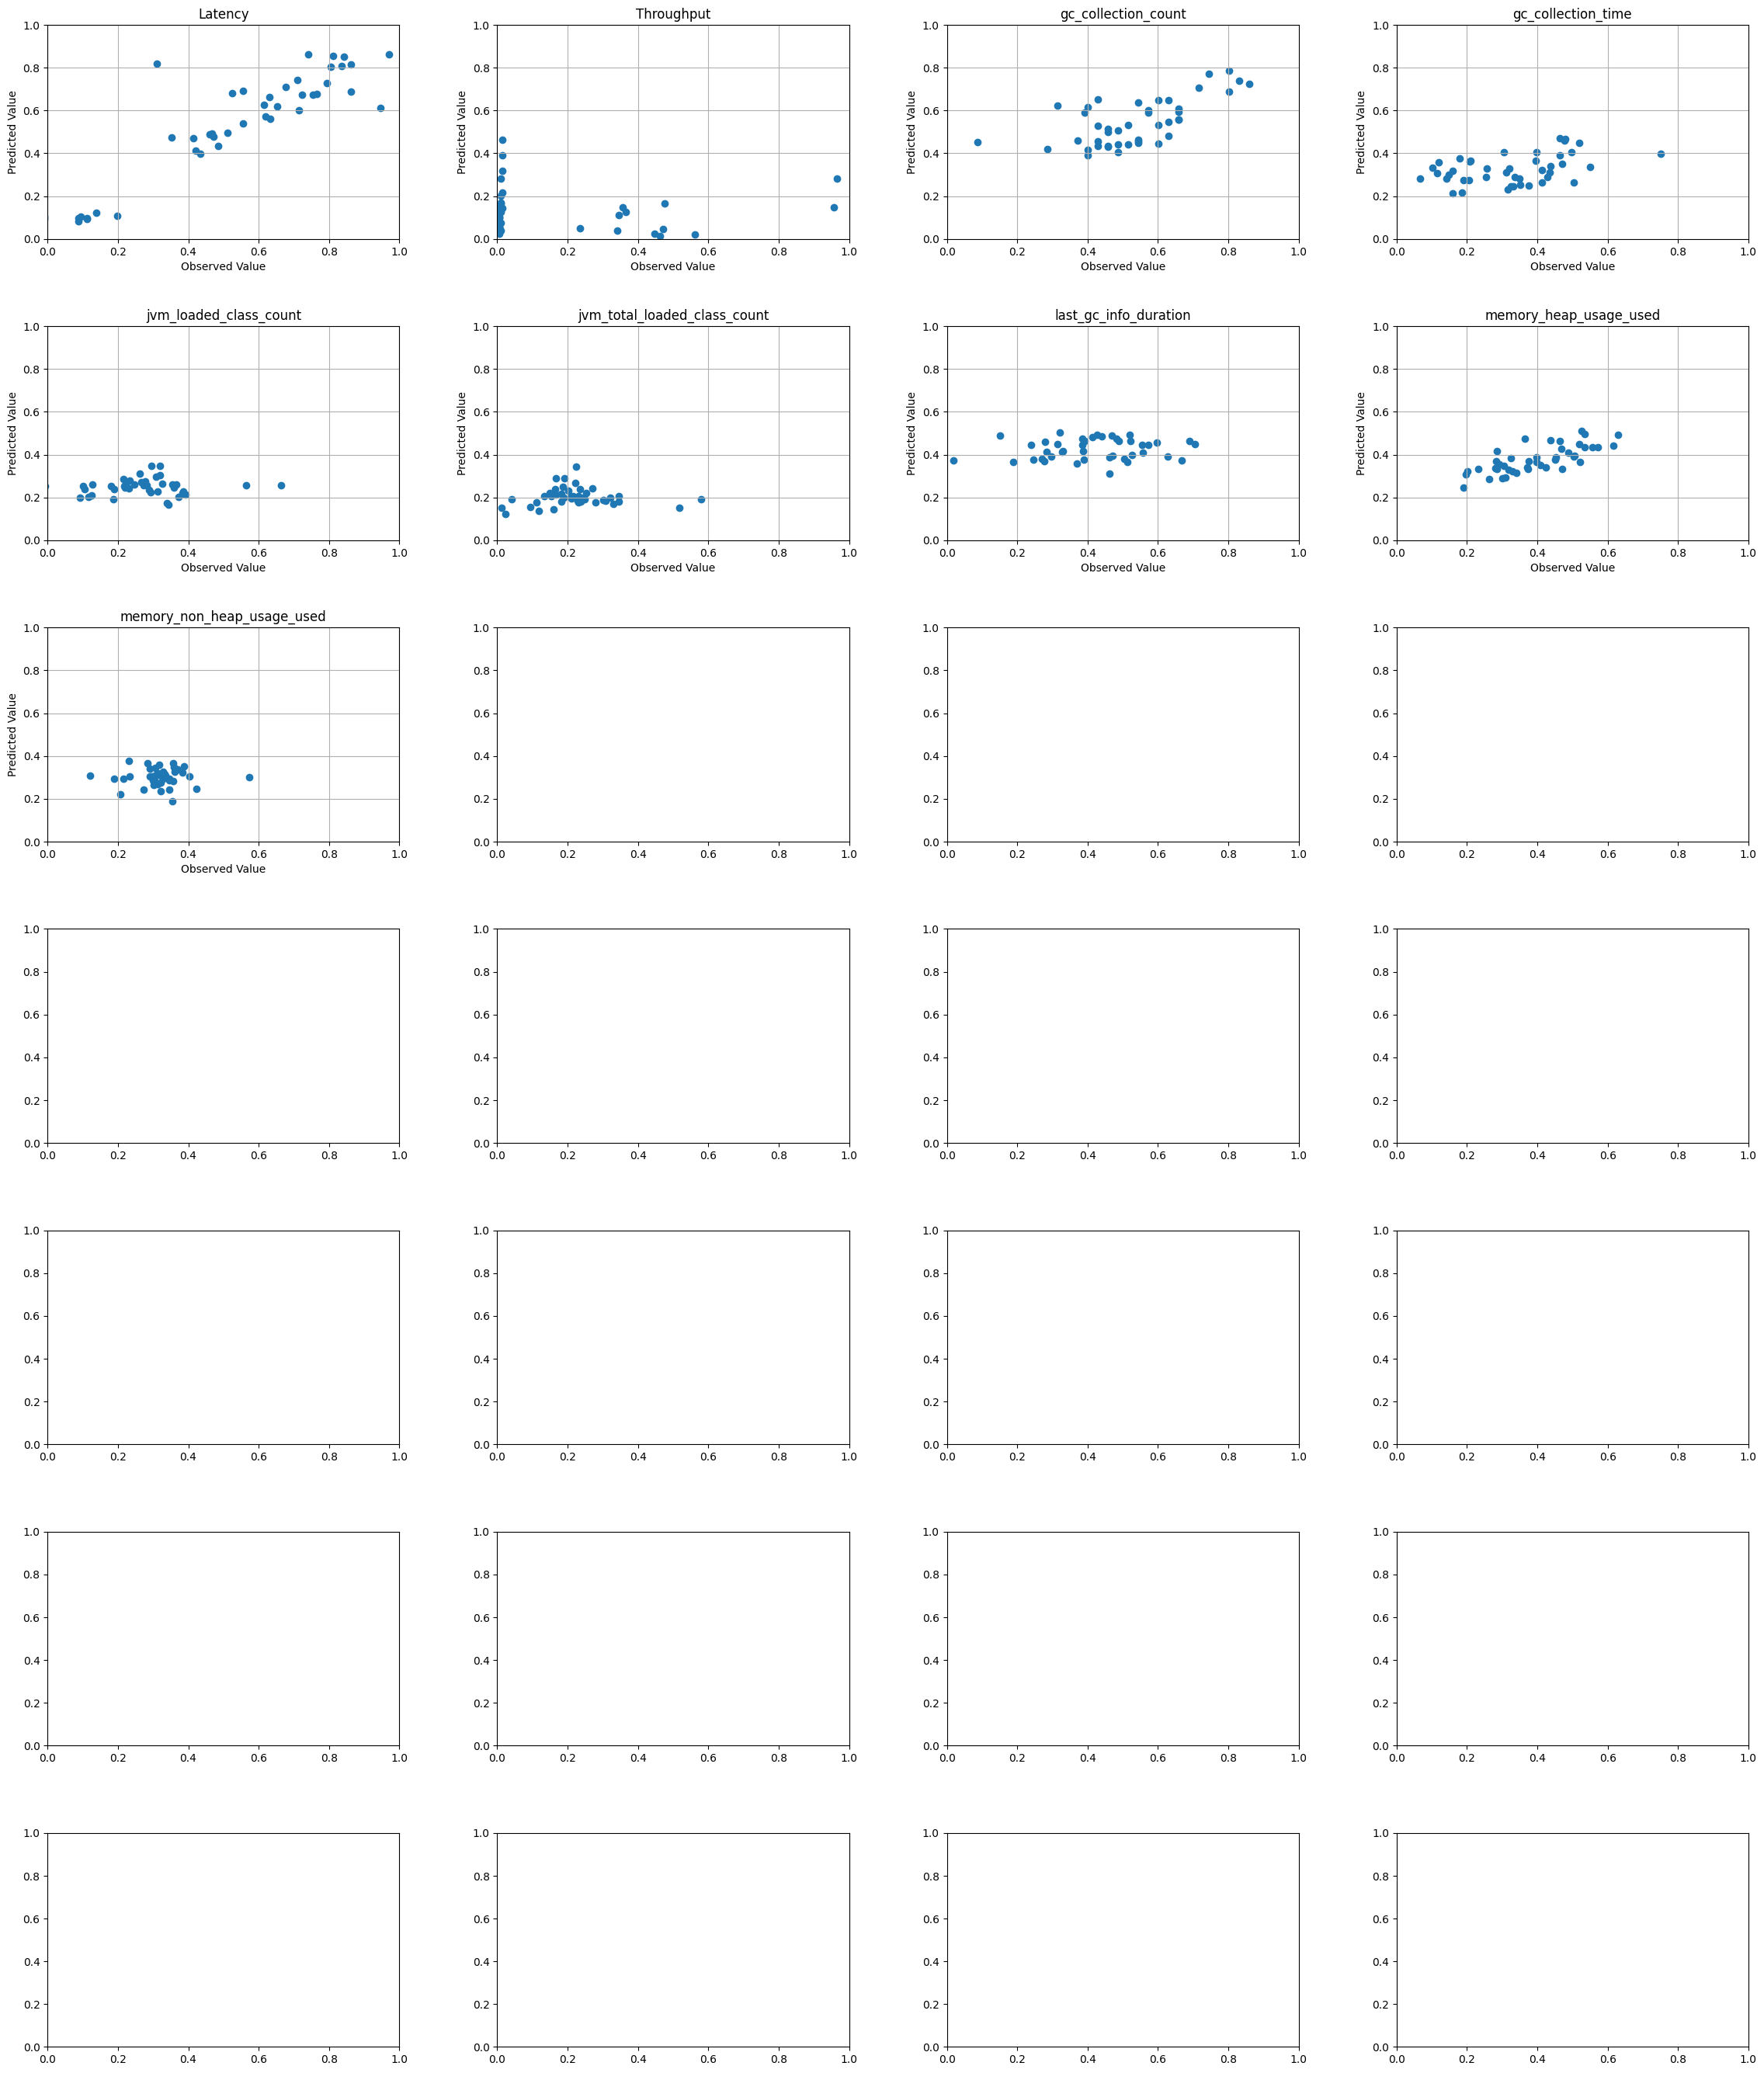

In [29]:
# Construct env prediction model using RF or GB
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_squared_log_error, mean_absolute_error, explained_variance_score, r2_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

w = 6
h = 4
ncols = 4
nrows = math.ceil(states.shape[1] / ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w * ncols, h * nrows))
fig.tight_layout(pad=6)

# Build regression model for every column
for i, col in enumerate(states.columns):
    # Prepare data
    y = states[col].to_frame()
    y = y[y[col] != 'None']  # Remove 'None' values
    X = schedule.loc[y.index]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000)

    # Scale features and target
    scaler_X = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(scaler_X.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns, index=X_test.index)

    scaler_y = MinMaxScaler().fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train), columns=y_train.columns, index=y_train.index)
    y_test = pd.DataFrame(scaler_y.transform(y_test), columns=y_test.columns, index=y_test.index)

    # Save scaled data for debugging
    y_train.to_csv('tmp/%s-train.csv' % col)
    y_test.to_csv('tmp/%s-test.csv' % col)

    # Choose the best model from RF and GB
    best_score = -float('inf')
    best_model = None
    rf = RandomForestRegressor(random_state=1000)
    gb = GradientBoostingRegressor(random_state=1000)
    models = [gb, rf]

    for model in models:
        # Define evaluation procedure
        cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1000)
        n_scores = cross_val_score(model, X_train, y_train.to_numpy().squeeze(), scoring='r2', cv=cv, n_jobs=-1)
        mean_score = np.mean(n_scores)
        print(f'{col} with {model.__class__.__name__}: R2 = {mean_score:.3f} (±{np.std(n_scores):.3f})')

        # Update best model if score is higher
        if mean_score > best_score:
            best_score = mean_score
            best_model = model

    # Train the best model
    best_model.fit(X_train, y_train.to_numpy().squeeze())
    joblib.dump(best_model, './models/%s.joblib' % col)

    # Predict on test set
    y_predict = best_model.predict(X_test)

    # Plot results
    r = int(i / ncols)
    c = int(i % ncols)
    ax[r][c].set_xlim(0, 1)
    ax[r][c].set_ylim(0, 1)
    ax[r][c].set_title(col)
    ax[r][c].set_xlabel('Observed Value')
    ax[r][c].set_ylabel('Predicted Value')
    ax[r][c].grid()
    ax[r][c].scatter(y_test, y_predict)

# Save the figure
plt.savefig('results.png', dpi=300)
plt.close()